# MATH 441 Discrete Optimization Problems

## September 27, 2022

* Network Flows
* Examples

In [1]:
import numpy as np
import scipy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [2]:
def plotG(V,E,arrow_length=0.5,arrow_width=0.01,figsize=None):
    V = np.array(V); E = np.array(E);
    if figsize:
        plt.figure(figsize=figsize)
    for e in E:
        i,j = e
        plt.plot([V[i,0],V[j,0]],[V[i,1],V[j,1]],'k')
        plt.arrow(V[i,0],V[i,1],(V[j,0] - V[i,0])*arrow_length,(V[j,1] - V[i,1])*arrow_length,width=arrow_width,color='k')
    plt.plot(V[:,0],V[:,1],'w.',markersize=40,markeredgecolor='k')
    for i in range(V.shape[0]):
        plt.annotate(str(i),xy=V[i,:],ha='center',va='center')
    plt.axis(False)
    plt.show()

## Network Flows

Let $G = (V,E)$ be a **network** (ie. connected, directed graph) where $V$ is the set of **nodes** and $E$ is the set of **edges**. Enumerate the nodes such that each node is assigned an index $i$ from $0$ to $n-1$ where $n = |V|$ is the total number of nodes.

Each node is assigned a **supply/demand** value $b_i$. We **assume** the total supply is equal to the total demand $\sum_i b_i = 0$. If $b_i > 0$ then node $i$ is a **source** with **supply** $b_i$, if $b_i < 0$ then node $i$ is a **sink** with **demand** $b_i$, and if $b_i = 0$ then node $i$ is a **shipping** node. Let $\mathbf{b}$ be the **supply constraint** vector. Note that $\mathbf{b}$ has length $n$.

Let $c_{ij}$ be the **cost** to ship a unit of product from node $i$ to $j$ along the edge from node $i$ to node $j$. Let $c_{ij} = 0$ if node $i$ and node $j$ are not connected by an edge. The **cost matrix** is $C = [c_{ij}]$. Note that $c_{ii} = 0$ for each $i=0,\dots,n-1$.

Let $x_{ij}$ be the total **flow** of product from node $i$ to node $j$. Let $x_{ij} = 0$ if node $i$ and node $j$ are not connected by an edge. The **network flow** is the matrix $X = [x_{ij}]$

Let $u_{ij}$ be the flow **capacity** of the edge connecting node $i$ and node $j$. The network flow $X = [x_{ij}]$ is subject to the contraint $0 \leq x_{ij} \leq u_{ij}$ for each pair $(i,j)$. Set $u_{ij}=0$ if there is no edge from node $i$ to node $j$.

Represent the matrix $X$ by a vector $\mathbf{x}$ by horizontally stacking the rows and removing the diagonal entries $x_{ii}$. For example:

$$
X = 
\begin{bmatrix}
x_{0,0} & x_{0,1} & x_{0,2} \\ x_{1,0} & x_{1,1} & x_{1,2} \\ x_{2,0} & x_{2,1} & x_{2,2} \end{bmatrix}
\hspace{2mm} \mapsto \hspace{2mm}
\mathbf{x} = \begin{bmatrix} x_{0,1} \\ x_{0,2} \\ x_{1,0} \\ x_{1,2} \\ x_{2,0} \\ x_{2,1} \end{bmatrix}
$$

Represent the matrices $C$ and $U$ by vectors $\mathbf{c}$ and $\mathbf{u}$ using the same procedure. Note that the vectors $\mathbf{x}$, $\mathbf{c}$ and $\mathbf{u}$ have length $n^2 - n$.

The **balance equation** at each node specifies that the flow into a node minus the flow out is equal to the supply/demand at the node. The balance equation at node $k$ is:

$$\sum_{i} x_{ik} - \sum_{j} x_{kj} = -b_k$$

Let $A$ be the matrix of the balance such that $A \mathbf{x} = -\mathbf{b}$ where $A$ has $n$ rows and $n^2 - n$ columns. Note that $A$ depends only on the number of nodes $n$ in the network. For example, the matrix equality $A \mathbf{x} = -\mathbf{b}$ for $n=3$ is:

$$
\left[ \begin{array}{rr}
-1 & -1 & 1 & 0 & 1 & 0 \\
1 & 0 & -1 & -1 & 0 & 1 \\
0 & 1 & 0 & 1 & -1 & -1
\end{array} \right]
\begin{bmatrix} x_{0,1} \\ x_{0,2} \\ x_{1,0} \\ x_{1,2} \\ x_{2,0} \\ x_{2,1} \end{bmatrix}
=
-\begin{bmatrix} b_0 \\ b_1 \\ b_2 \end{bmatrix}
$$

Write a function called `balance` which takes an integer $n$ and returns the matrix $A$ for the balance equations. Notice that $A$ is $n$ blocks of size $n \times (n-1)$ such that the $k$th block is given by the identity matrix of size $n-1$ with a rows of $-1$s inserted in the $k$th row.

In [3]:
I = np.eye(2)
np.insert(I,1,-1,axis=0)

array([[ 1.,  0.],
       [-1., -1.],
       [ 0.,  1.]])

In [4]:
def balance(n):
    blocks = []
    for k in range(n):
        block = np.insert(np.eye(n-1),k,-1,axis=0)
        blocks.append(block)
    A = np.hstack(blocks)
    return A

In [5]:
A = balance(3)
A

array([[-1., -1.,  1.,  0.,  1.,  0.],
       [ 1.,  0., -1., -1.,  0.,  1.],
       [ 0.,  1.,  0.,  1., -1., -1.]])

In [6]:
np.linalg.matrix_rank(A)

2

In [7]:
A = balance(4)
A

array([[-1., -1., -1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0., -1., -1., -1.,  0.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0., -1., -1., -1.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1., -1., -1., -1.]])

In [8]:
np.linalg.matrix_rank(A)

3

**Question.** Why is the rank of the balance matrix $A$ equal to $n-1$ and not $n$?

## Example

Compute the optimal newtork flow for the network below given $\mathbf{b} = (5,-1,-1,-1,-1,-1)$, $c_{ij} = 1$ for each edge except $c_{0,1}=10$ and constraints $u_{ij} = 2$ for each edge.

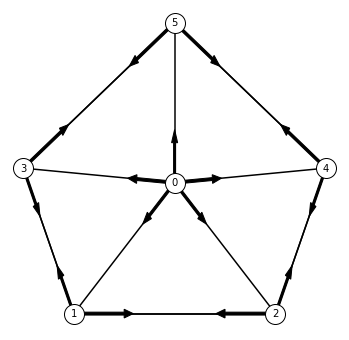

In [9]:
V = [(0,-0.1),(-1,-1),(1,-1),(-1.5,0),(1.5,0),(0,1)]
E = [(0,1),(0,2),(0,3),(0,4),(0,5),(1,2),(1,3),(2,1),(2,4),(3,1),(3,5),(4,2),(4,5),(5,3),(5,4)]
plotG(V,E,arrow_width=0.02,arrow_length=0.25,figsize=(6,6))

Let's build $\mathbf{c}$, $\mathbf{b}$, $\mathbf{u}$ using vectors of size $n^2 - n$ to correspond to the order of elements in the vector

$$
\mathbf{x} = \begin{bmatrix} x_{0,1} \\ x_{0,2} \\ \vdots \\ x_{0,5} \\ x_{1,0} \\ x_{1,2} \\ \vdots \\ x_{5,4} \end{bmatrix}
$$

In [10]:
n = 6
c = np.ones(n**2 - n)
c[0] = 10
c

array([10.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

There are 2 kinds of constraints: balance equations and the capacities. Construct the matrix $A$ for the balance equations.

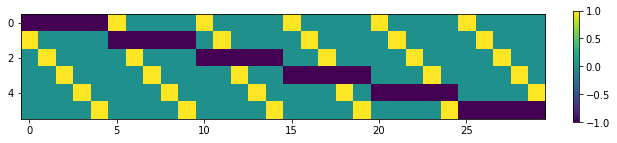

In [11]:
A = balance(n)
plt.figure(figsize=(10,5))
plt.imshow(A), plt.colorbar(fraction=0.01)
plt.show()

In [12]:
b = -np.ones(n)
b[0] = n-1
b

array([ 5., -1., -1., -1., -1., -1.])

In [13]:
u = np.zeros(n**2 - n)
u[[0,1,2,3,4,6,7,11,13,16,19,22,24,28,29]] = 2
u

array([2., 2., 2., 2., 2., 0., 2., 2., 0., 0., 0., 2., 0., 2., 0., 0., 2.,
       0., 0., 2., 0., 0., 2., 0., 2., 0., 0., 0., 2., 2.])

Use rows first n-1 rows of $A$ and $\mathbf{b}$ to avoid warning about $A$ having dependent rows.

In [14]:
I = np.eye(n**2 - n)
solution = linprog(c,A_eq=A[:n-1],b_eq=-b[:n-1],A_ub=I,b_ub=u)
solution

     con: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.22044605e-16,
       1.11022302e-16])
     fun: 6.00000000087239
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([2. , 0.5, 0.5, 1. , 1. , 0. , 2. , 2. , 0. , 0. , 0. , 1.5, 0. ,
       2. , 0. , 0. , 1.5, 0. , 0. , 2. , 0. , 0. , 2. , 0. , 2. , 0. ,
       0. , 0. , 2. , 2. ])
  status: 0
 success: True
       x: array([1.76751218e-11, 1.50000000e+00, 1.50000000e+00, 1.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 2.14663054e-11, 2.14663054e-11,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.00000000e-01,
       0.00000000e+00, 1.87400870e-10, 0.00000000e+00, 0.00000000e+00,
       5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 1.87400870e-10,
       0.00000000e+00, 0.00000000e+00, 2.60339033e-11, 0.00000000e+00,
       1.09126934e-10, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.60339033e-11, 1.09126934e-10])

In [15]:
solution.x.round(2).reshape(n,n-1)

array([[0. , 1.5, 1.5, 1. , 1. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ]])

This means there is no flow from node 0 to node 1 because the cost is higher. The demand at node 1 satisfied by tw0-step flow from 0 to 3 to 1 (or 0 to 2 to 1).

**Question**. There are infinitely many optimal solutions to the problem above. Describe all optimal solutions.

## Example

Compute the optimal network flow given $\mathbf{b} = (5,-1,-1,-1,-1,-1)$, $c_{ij} = 1$ for each edge except $c_{0,1}=10$, $c_{0,2}=2$ and constraints $u_{ij} = 2$ for each edge.

In [16]:
n = 6
c = np.ones(n**2 - n)
c[0] = 10
c[1] = 2
A = balance(n)
b = -np.ones(n)
b[0] = n-1
u = np.zeros(n**2 - n)
u[[0,1,2,3,4,6,7,11,13,16,19,22,24,28,29]] = 2
I = np.eye(n**2 - n)
solution = linprog(c,A_eq=A[:n-1],b_eq=-b[:n-1],A_ub=I,b_ub=u)

In [17]:
solution.x.round(2).reshape(n,n-1)

array([[0.  , 0.63, 2.  , 1.37, 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.37, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ]])

## Example

Import datasets `stations.csv` and `edges.csv` and plot the network.

In [18]:
nodes = pd.read_csv("stations.csv",index_col=0)

In [19]:
nodes

,name,x,y
index,,,
5,Boundary1st,-123.023421,49.269459
2,BoundaryHastings,-123.023351,49.281132
11,BroadwayClark,-123.077599,49.262378
17,Cambie41st,-123.116058,49.233520
9,CambieBroadway,-123.114716,49.263235
4,Clark1st,-123.077314,49.269678
0,Downtown,-123.121405,49.280311
15,Granville41st,-123.139608,49.234332
7,GranvilleBroadway,-123.138557,49.263650


In [20]:
nodes.sort_values(by="index")

,name,x,y
index,,,
0,Downtown,-123.121405,49.280311
1,HastingsClark,-123.077084,49.281288
2,BoundaryHastings,-123.023351,49.281132
3,MainTerminal,-123.099939,49.272719
4,Clark1st,-123.077314,49.269678
5,Boundary1st,-123.023421,49.269459
6,UBC,-123.252496,49.264878
7,GranvilleBroadway,-123.138557,49.263650
8,OakBroadway,-123.126579,49.263357


In [21]:
edges = pd.read_csv("edges.csv")

In [22]:
edges

,from,to
0,5,2
1,5,4
2,5,12
3,2,5
4,2,1
...,...,...
79,8,9
80,8,7
81,8,16
82,6,7


In [23]:
V = nodes.sort_values(by="index").iloc[:,[1,2]].values
E = edges.values

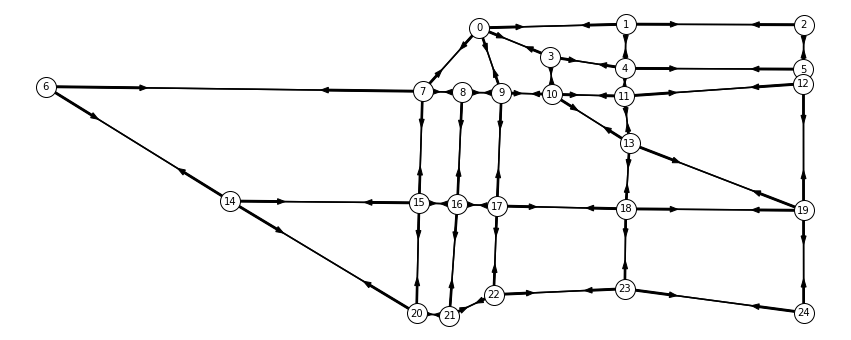

In [24]:
plotG(V,E,arrow_length=0.25,arrow_width=0.0005,figsize=(15,6))

It will take a lot of work (and patience) to collect the constraint data and then compute the max-flow. Maybe this is a group project?